In [ ]:
#https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

In [ ]:
#https://guillaumegenthial.github.io/sequence-to-sequence.html

(20, 256, 256, 3)


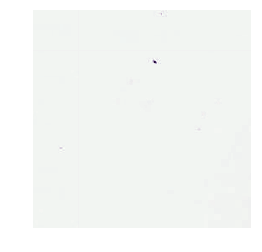

In [7]:

from keras.applications.resnet50 import ResNet50, preprocess_input as preprocess_resnet, decode_predictions
from keras.applications.inception_v3 import InceptionV3, preprocess_input as preprocess_inception
from keras.applications.vgg16 import VGG16, preprocess_input as preprocess_vgg
from keras.preprocessing import image
from keras import backend as K
from keras.models import Model
from keras.layers import GlobalAveragePooling2D, Concatenate
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import os
import pickle

import os
os.chdir("/home/llu/HardDisk/Bitbucket/HCC_image/results/image_features")
###Visualizing Feature Maps

img_path = '/home/ardend/code/applied_deep_learning/data/cats_and_dogs_small/train/cats/cat.54.jpg'

file_path = '/home/llu/HardDisk/TCGA_HC_image/results/Feature_extraction_FeatureMapping/VGG-0.5-256/TCGA-W5-AA2U-01Z-00-DX1.156F2419-5D8B-410C-B1CA-20F60602A5BA_FM.npy'
data = np.load(file_path)
print(data.shape)

#img = image.load_img(data, target_size=(256, 256))
#img_tensor = image.img_to_array(img)
#img_tensor = np.expand_dims(img_tensor, axis=0)

sample = "TCGA-W5-AA2U-01"
index = 5

for index in range(20):

    img_tensor = data[index, :]

    #fig = plt.gcf()

    plt.imshow(img_tensor, cmap='viridis')
    plt.axis('off')
    #plt.show()
    #plt.draw()

    plt.savefig("Rawimage_" + sample + "_" + str(index) + ".pdf")

(1, 256, 256, 3)
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_44 (InputLayer)        (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, No

/home/llu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in true_divide


(1, 256, 256, 3)
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_45 (InputLayer)        (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, No

KeyboardInterrupt: 

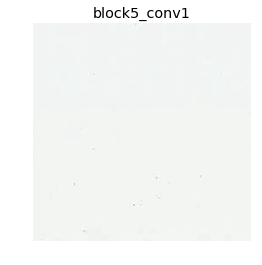

In [18]:

sample = "TCGA-W5-AA2U-01"
index = 5

for index in range(20):

    img_tensor = data[index, :]

    #fig = plt.gcf()

    plt.imshow(img_tensor, cmap='viridis')
    plt.axis('off')
    #plt.show()
    #plt.draw()

    plt.savefig("Rawimage_" + sample + "_" + str(index) + ".pdf")
    

    img_tensor = img_tensor / 255

    img_tensor = np.expand_dims(img_tensor, axis=0)
    print(img_tensor.shape)


    vgg = VGG16(weights='imagenet', include_top=False)
    vgg.summary()


    # Extracts the outputs of the top 8 layers:
    layer_outputs = [layer.output for layer in vgg.layers if 'conv1' in layer.name]
    activation_model = Model(inputs=vgg.input, outputs=layer_outputs)
    intermediate_activations = activation_model.predict(img_tensor)

    first_layer_activation = intermediate_activations[0]


    #plt.imshow(first_layer_activation[0, :, :, 19], cmap='viridis')
    #plt.axis('off')
    #plt.show()

    layer_names = ['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1', 'block5_conv1']

    layer_outputs = [layer.output for layer in vgg.layers if layer.name in layer_names]
    activation_model = Model(inputs=vgg.input, outputs=layer_outputs)
    intermediate_activations = activation_model.predict(img_tensor)

    images_per_row = 8
    max_images = 8
    # Now let's display our feature maps
    for layer_name, layer_activation in zip(layer_names, intermediate_activations):
        # This is the number of features in the feature map
        n_features = layer_activation.shape[-1]
        n_features = min(n_features, max_images)

        # The feature map has shape (1, size, size, n_features)
        size = layer_activation.shape[1]

        # We will tile the activation channels in this matrix
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))

        # We'll tile each filter into this big horizontal grid
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,
                                                 :, :,
                                                 col * images_per_row + row]
                # Post-process the feature to make it visually palatable
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size,
                             row * size : (row + 1) * size] = channel_image

        # Display the grid
        scale = 2. / size
        #plt.figure(figsize=(scale * display_grid.shape[1],
        #                    scale * display_grid.shape[0]))
        plt.axis('off')
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

    #plt.show()

    plt.savefig("Blockimage_" + sample + "_" + str(index) + ".pdf")



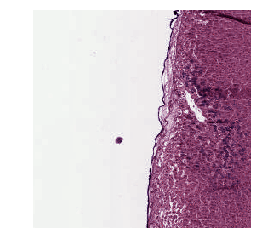

In [63]:
scale * display_grid.shape[1]
scale * display_grid.shape[0]

sample = "TCGA-W5-AA2U-01"
index = 11

img_tensor = data[index, :]

plt.imshow(img_tensor, cmap='viridis')
plt.axis('off')
plt.show()

#plt.savefig("Rawimage_" + sample + "_" + str(index) + ".pdf")

(1, 256, 256, 3)
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_53 (InputLayer)        (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, No

/home/llu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in true_divide


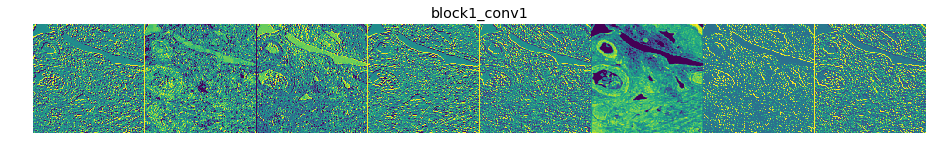

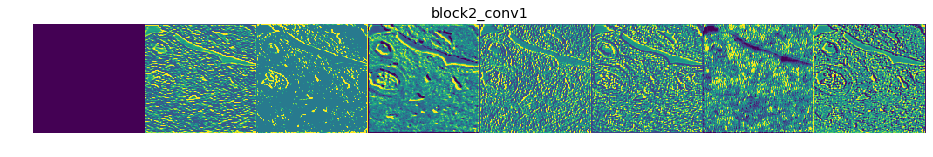

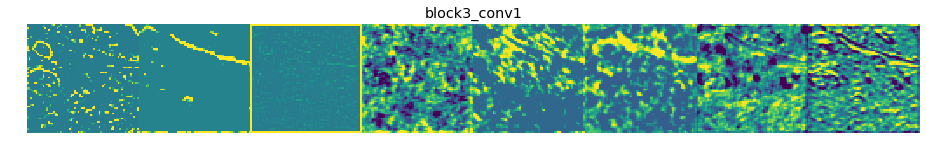

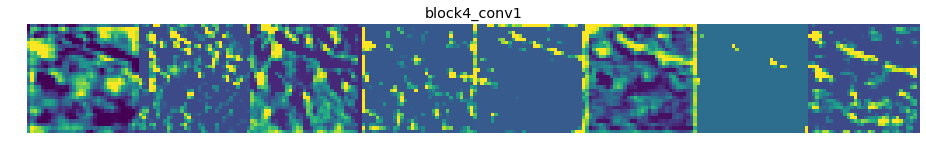

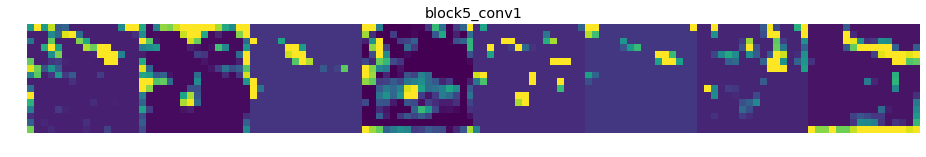

In [51]:


img_tensor = img_tensor / 255

img_tensor = np.expand_dims(img_tensor, axis=0)
print(img_tensor.shape)


vgg = VGG16(weights='imagenet', include_top=False)
vgg.summary()


# Extracts the outputs of the top 8 layers:
layer_outputs = [layer.output for layer in vgg.layers if 'conv1' in layer.name]
activation_model = Model(inputs=vgg.input, outputs=layer_outputs)
intermediate_activations = activation_model.predict(img_tensor)

first_layer_activation = intermediate_activations[0]


#plt.imshow(first_layer_activation[0, :, :, 19], cmap='viridis')
#plt.axis('off')
#plt.show()

layer_names = ['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1', 'block5_conv1']

layer_outputs = [layer.output for layer in vgg.layers if layer.name in layer_names]
activation_model = Model(inputs=vgg.input, outputs=layer_outputs)
intermediate_activations = activation_model.predict(img_tensor)

images_per_row = 8
max_images = 8
# Now let's display our feature maps


for layer_name, layer_activation in zip(layer_names, intermediate_activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]
    n_features = min(n_features, max_images)

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 2. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.axis('off')
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
#plt.show()

fig.savefig("Blockimage_" + sample + "_" + str(index) + ".pdf")
plt.close(fig)

In [85]:
os.getcwd()

'/mnt/bd06fc02-8c9b-4136-8b47-32feeccaa93b/TCGA_HC_image/results/image_features'

In [ ]:
## plot the training process


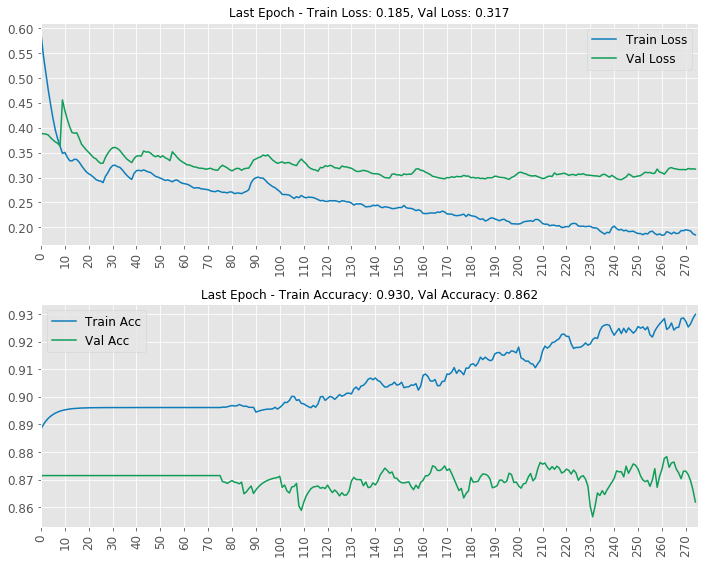

In [109]:


history = load_history('/home/llu/HardDisk/Bitbucket/HCC_image/results/history_256.bin')
plot_compare(history)

In [91]:
steps = -1
history = load_history('/home/llu/HardDisk/Bitbucket/HCC_image/results/history_256.bin')

acc = smooth_curve(history.history['acc'][:steps])
val_acc = smooth_curve(history.history['val_acc'][:steps])
loss = smooth_curve(history.history['loss'][:steps])
val_loss = smooth_curve(history.history['val_loss'][:steps])

max(val_acc)


0.87832923566195686

In [108]:
def smooth_curve(points, factor=0.8):
    smoothed = []
    for point in points:
        if smoothed:
            previous = smoothed[-1]
            smoothed.append(previous * factor + point * (1 - factor))
        else:
            smoothed.append(point)
    return smoothed

def plot_compare(history, steps=-1):
    if steps < 0:
        steps = len(history.history['acc'])
    acc = smooth_curve(history.history['acc'][:steps])
    val_acc = smooth_curve(history.history['val_acc'][:steps])
    loss = smooth_curve(history.history['loss'][:steps])
    val_loss = smooth_curve(history.history['val_loss'][:steps])
    
    plt.figure(figsize=(10, 8))
    
    plt.subplot(2, 1, 1)
    
    plt.plot(loss, c='#0c7cba', label='Train Loss')
    plt.plot(val_loss, c='#0f9d58', label='Val Loss')
    plt.xticks(range(0, len(loss), 10), rotation=90)
    plt.xlim(0, len(loss))
    plt.title('Last Epoch - Train Loss: %.3f, Val Loss: %.3f' % (loss[-1], val_loss[-1]), fontsize=12)
    plt.legend()
    
    
    plt.subplot(2, 1, 2)
    
    #plt.figure(figsize=(6, 4))
    plt.plot(acc, c='#0c7cba', label='Train Acc')
    plt.plot(val_acc, c='#0f9d58', label='Val Acc')
    plt.xticks(range(0, len(acc), 10), rotation=90)
    plt.xlim(0, len(acc))
    plt.title('Last Epoch - Train Accuracy: %.3f, Val Accuracy: %.3f' % (acc[-1], val_acc[-1]), fontsize=12)
    plt.legend()
    
    SMALL_SIZE = 12
    MEDIUM_SIZE = 20
    BIGGER_SIZE = 24

    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
    
    
    plt.tight_layout()
    plt.savefig("training.pdf")
    
    
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x
 
def save_history(history, fn):
    with open(fn, 'wb') as fw:
        pickle.dump(history.history, fw, protocol=2)

def load_history(fn):
    class Temp():
        pass
    history = Temp()
    with open(fn, 'rb') as fr:
        history.history = pickle.load(fr)
    return history

def jitter(img, amount=32):
    ox, oy = np.random.randint(-amount, amount+1, 2)
    return np.roll(np.roll(img, ox, -1), oy, -2), ox, oy

def reverse_jitter(img, ox, oy):
    return np.roll(np.roll(img, -ox, -1), -oy, -2)

def plot_image(img):
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.axis('off')

In [105]:
import os
os.getcwd()

'/mnt/bd06fc02-8c9b-4136-8b47-32feeccaa93b/TCGA_HC_image/results/image_features'

In [96]:
SimpleConV().Getmodel()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
maxpool_1 (MaxPooling2D)     (None, 128, 128, 32)      0         
_________________________________________________________________
conv_2 (Conv2D)              (None, 128, 128, 64)      18496     
_________________________________________________________________
maxpool_2 (MaxPooling2D)     (None, 64, 64, 64)        0         
_________________________________________________________________
conv_3 (Conv2D)              (None, 64, 64, 128)       73856     
_________________________________________________________________
maxpool_3 (MaxPooling2D)     (None, 32, 32, 128)       0         
_____

In [95]:
from keras.applications.resnet50 import ResNet50, preprocess_input as preprocess_resnet, decode_predictions
from keras.applications.inception_v3 import InceptionV3, preprocess_input as preprocess_inception
from keras.applications.vgg16 import VGG16, preprocess_input as preprocess_vgg
from keras.preprocessing import image
from keras import backend as K
from keras.models import Model
from keras.layers import GlobalAveragePooling2D, Concatenate
import numpy as np
from keras.models import Model, Sequential, load_model
from keras.layers import Dense, Input, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.datasets import mnist
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.applications import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from keras import backend as K
from keras import activations

import openslide
import cv2
import sys
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import os
import pickle
import re



class SimpleConV():
    
    __name__ = "SimpleConV"

    def Getmodel(self, batch_size=16):
    
        model = Sequential()
        model.add(Conv2D(32, (3, 3), activation='relu', padding='same', name='conv_1', 
                         input_shape=(256, 256, 3)))
        model.add(MaxPooling2D((2, 2), name='maxpool_1'))
        model.add(Conv2D(64, (3, 3), activation='relu', padding='same', name='conv_2'))
        model.add(MaxPooling2D((2, 2), name='maxpool_2'))
        model.add(Conv2D(128, (3, 3), activation='relu', padding='same', name='conv_3'))
        model.add(MaxPooling2D((2, 2), name='maxpool_3'))
        model.add(Conv2D(128, (3, 3), activation='relu', padding='same', name='conv_4'))
        model.add(MaxPooling2D((2, 2), name='maxpool_4'))
        model.add(Flatten())
        model.add(Dropout(0.5))
        model.add(Dense(512, activation='relu', name='dense_1'))
        model.add(Dense(128, activation='relu', name='dense_2'))
        model.add(Dense(2, activation='sigmoid', name='output'))
        
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        
        model.summary()

#        model.fit(features_for_train_data, y_train,
#                  nb_epoch=80,
#                  batch_size=32,
#                  validation_data=(features_for_test_data, y_val))
#        
#        model.compile(optimizer='adam',
#                    loss='sparse_categorical_crossentropy',
#                    metrics=['accuracy'])
#        
#        model.summary()
    
        return model

In [ ]:
## add alexnet pre-trained


In [ ]:
from keras.applications.resnet50 import ResNet50


Using TensorFlow backend.


RuntimeError: module compiled against API version 0xc but this version of numpy is 0xb

ImportError: numpy.core.multiarray failed to import

ImportError: numpy.core.umath failed to import

ImportError: numpy.core.umath failed to import

In [ ]:
import keras_applications



In [ ]:
from keras_applications.resnext import ResNeXt50
from keras_applications.resnext import ResNeXt101

In [ ]:
import keras

keras.__version__


Using TensorFlow backend.


RuntimeError: module compiled against API version 0xc but this version of numpy is 0xb

ImportError: numpy.core.multiarray failed to import

ImportError: numpy.core.umath failed to import

ImportError: numpy.core.umath failed to import

In [ ]:
model = ResNeXt50(include_top=False, weights='imagenet', pooling="avg")